## Executive Summary

### • Topic

Chinese Culture

### • Reasons Why I Chose the Topic

China is a country with a fairly long history so its culture is very extensive and profound. Chinese culture has been closly related to all aspects of China, including economy, policy, society, so on and so forth. I always feel that the world’s lack of understanding of China is essentially due to the lack of understanding of its culture. Therefore, I am interested to find out how Chinese culture is discussed or disseminated on Twitter, which is mainly used by people from oversea countries. 

### • Twitter Search Query

Chineseculture

### • Total Number of Tweets

Approximately 18.6K (18591)

### • Total Number of Unique Users

Approximately 18.1K (18141)

### • Date Range

2017-08-01 - 2019-03-31 (the last 20 months)

### • Key Findings & Lessons in Words

1. It was impressive to me that the keyword <i>"short"</i> and the phrase <i>"empty nest syndrome"</i> were very prevalent on Twitter. After investigation, I found it was actually associated to the controversy about a short film named "Bao", which illustrats the strong Chinese traditional mother-child relationship. To me, the short film presented a very clear message, but to people from other counturies, it seems very difficult to understand. Although I did expect that there may be some confusions, the contraversal discussion still exceeds my estimation.      

2. Another set of keywords <i>"disrespect"</i>, <i>"negativity"</i>, and <i>"uncultur"</i> were also related to discussion over traditional Chinese dress and stories. I never thought that people from other countries could not wear traditional Chinese dress qipao, nor did I realize that traditional stories can also cause dispute. As I know, China has made many English subtitled movies in order to introduce China to the rest of the world, but it seems that those movie makers should embed more culture aspect as a background introduction to facilitate understanding. 

3. It was intriguing to see the highest peak of the Tweet volume for a day (Nov. 3, 2018) when Yixing Zhang, a young Chinese pop music singer and movie actor, said he wants to lead Chinese music to the world. 

4. As I expected, there's not much difference in terms of keywords usage between males and females. 

### • Future Work

1. I am suprised that almost all really important words that closely associated to Chinese culture or could perfectly represent Chinese culture are missed from the popula word list. I think it would be interesting to do a similar analysis over Weibo, a Chinese version Twitter which is mainly used by Chinese people. I am very interested to see how the results differ from those on Twitter. 

2. It would be very interesting if I could narrow down my analysis to something, for example, <i>"Chinese food"</i>, or some key person, like <i>"Confucius"</i>, so I can get a more detailed, specified result. 

<hr>

## Import modules

In [1]:
from collections import Counter              # word counting
import gender_guesser.detector as gender     # gender prediction 
from IPython.display import Image            # image display
from matplotlib import pyplot as plt         # visualization
from multiprocessing import Pool             # parallel processing 
from nltk.corpus import stopwords            # English stopwords
import numpy as np                           # array_split() function
import pandas as pd                          # data manipulation
from textblob import TextBlob                # sentiment analysis and part-of-speech tagging
import twitter                               # Twitter APIs handling
from wordcloud import WordCloud              # word cloud

# inline display of images
%matplotlib inline
pd.set_option('display.max_colwidth', 200)   # set the maximum column width to 200

## Load Tweet data as a Pandas dataframe

In [2]:
keyword = "chineseculture"

In [3]:
months = ["201903", "201902", "201901", "201812", "201811", "201810", "201809", "201808", "201807", "201806", 
          "201805", "201804", "201803", "201802", "201801", "201712", "201711", "201710", "201709", "201708",]

In [4]:
df = pd.DataFrame()

for month in months:
    print("*** " + month)
    file_name = "tweets_{}_{}.csv".format(keyword, month)
    df_tmp = pd.read_csv(file_name, sep="\t", header=0, index_col=False)
    
    ######################################################################
    # Create a random sample of 1000 records.
    ######################################################################
#    df_tmp = df_tmp.sample(n=1000, random_state=0)
    
    ######################################################################
    # Add the random sample to df.
    ######################################################################
    df = pd.concat([df, df_tmp])
    
    print("# of Tweets: {:,}".format(len(df_tmp)))
    print("Total # of loaded Tweets: {:,}".format(len(df)))
    print()

*** 201903
# of Tweets: 354
Total # of loaded Tweets: 354

*** 201902
# of Tweets: 403
Total # of loaded Tweets: 757

*** 201901
# of Tweets: 588
Total # of loaded Tweets: 1,345

*** 201812
# of Tweets: 325
Total # of loaded Tweets: 1,670

*** 201811
# of Tweets: 1,543
Total # of loaded Tweets: 3,213

*** 201810
# of Tweets: 175
Total # of loaded Tweets: 3,388

*** 201809
# of Tweets: 165
Total # of loaded Tweets: 3,553

*** 201808
# of Tweets: 416
Total # of loaded Tweets: 3,969

*** 201807
# of Tweets: 157
Total # of loaded Tweets: 4,126

*** 201806
# of Tweets: 8,881
Total # of loaded Tweets: 13,007

*** 201805
# of Tweets: 593
Total # of loaded Tweets: 13,600

*** 201804
# of Tweets: 1,331
Total # of loaded Tweets: 14,931

*** 201803
# of Tweets: 216
Total # of loaded Tweets: 15,147

*** 201802
# of Tweets: 261
Total # of loaded Tweets: 15,408

*** 201801
# of Tweets: 218
Total # of loaded Tweets: 15,626

*** 201712
# of Tweets: 190
Total # of loaded Tweets: 15,816

*** 201711
# of

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18591 entries, 0 to 140
Data columns (total 20 columns):
id                                18591 non-null int64
created_at                        18591 non-null object
retweet_count                     18591 non-null int64
text                              18591 non-null object
user_id                           18591 non-null int64
user_name                         17495 non-null object
user_screen_name                  18591 non-null object
user_followers_count              18591 non-null int64
user_listed_count                 18591 non-null int64
user_statuses_count               18591 non-null int64
user_friends_count                18591 non-null int64
user_favourites_count             18591 non-null int64
user_location                     12173 non-null object
user_desc                         15967 non-null object
user_created_at                   18591 non-null object
retweeted_status_id               16496 non-null float64
retw

## Adjust the data types of columns

In [6]:
df.id = df.id.astype("str")
df.user_id = df.user_id.astype("str")
df.created_at = df.created_at.astype("datetime64")
df.user_created_at = df.user_created_at.astype("datetime64")
df.retweeted_status_created_at = df.retweeted_status_created_at.astype("datetime64")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18591 entries, 0 to 140
Data columns (total 20 columns):
id                                18591 non-null object
created_at                        18591 non-null datetime64[ns]
retweet_count                     18591 non-null int64
text                              18591 non-null object
user_id                           18591 non-null object
user_name                         17495 non-null object
user_screen_name                  18591 non-null object
user_followers_count              18591 non-null int64
user_listed_count                 18591 non-null int64
user_statuses_count               18591 non-null int64
user_friends_count                18591 non-null int64
user_favourites_count             18591 non-null int64
user_location                     12173 non-null object
user_desc                         15967 non-null object
user_created_at                   18591 non-null datetime64[ns]
retweeted_status_id               16496 non

## Check the number of rows, or Tweets

In [8]:
len(df)

18591

## Check the number of unique users

In [9]:
len(set(df.user_id))

18141

## Check the time range

In [10]:
min_created_at = df.created_at.min()
max_created_at = df.created_at.max()

min_created_at, max_created_at

(Timestamp('2017-08-01 06:01:55'), Timestamp('2019-03-31 23:02:25'))

In [11]:
max_created_at - min_created_at

Timedelta('607 days 17:00:30')

## Add new columns for Tweet sentiment, PoS tagging, and user gender

In [12]:
def parallelize_series(series, func, num_partitions, num_cores):
    ######################################################################
    # Split the whole series.
    ######################################################################
    series_split = np.array_split(series, num_partitions)
    
    ######################################################################
    # Assign each split to a core and merge all of the outputs.
    ######################################################################
    pool = Pool(num_cores)
    series = pd.concat(pool.map(func, series_split))
    
    pool.close()
    pool.join()
    
    return series

In [13]:
def get_gender(name):
    if len(name.split()) == 0:
        return "unknown"
    
    first_name = name.split()[0]               # Take the first name.
    
    ######################################################################
    # Apply some heuristics.
    ######################################################################
    if first_name.startswith("Mr."):
        return "male"
    if first_name.startswith("Ms.") or first_name.startswith("Mrs."):
        return "female"
    
    user_gender = d.get_gender(first_name)
    
    ######################################################################
    # For simplicity, treat most_female as female and most_male as male.
    ######################################################################
    if user_gender == "mostly_female":
        return "female"
    elif user_gender == "mostly_male":
        return "male"
    
    return user_gender

def get_polarity(series):
    return series.apply(lambda x: TextBlob(str(x)).sentiment.polarity)

def get_subjectivity(series):
    return series.apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

def get_pos(series):
    return series.apply(lambda x: TextBlob(str(x)).tags)

def get_user_gender(series):
    return series.apply(lambda x: get_gender(str(x)))

In [14]:
num_cores = 10

In [15]:
%time df["polarity"] = parallelize_series(series=df.text, func=get_polarity, num_partitions=num_cores, num_cores=num_cores)

CPU times: user 37.7 ms, sys: 87.7 ms, total: 125 ms
Wall time: 923 ms


In [16]:
%time df["subjectivity"] = parallelize_series(series=df.text, func=get_subjectivity, num_partitions=num_cores, num_cores=num_cores)

CPU times: user 36.9 ms, sys: 83.3 ms, total: 120 ms
Wall time: 920 ms


In [17]:
%time df["pos"] = parallelize_series(series=df.text, func=get_pos, num_partitions=num_cores, num_cores=num_cores)

CPU times: user 1.95 s, sys: 217 ms, total: 2.17 s
Wall time: 5.97 s


In [18]:
d = gender.Detector(case_sensitive=False)

%time df["user_gender"] = parallelize_series(series=df.user_name, func=get_user_gender, num_partitions=num_cores, num_cores=num_cores)

CPU times: user 37.6 ms, sys: 79.7 ms, total: 117 ms
Wall time: 217 ms


In [19]:
df.columns

Index(['id', 'created_at', 'retweet_count', 'text', 'user_id', 'user_name',
       'user_screen_name', 'user_followers_count', 'user_listed_count',
       'user_statuses_count', 'user_friends_count', 'user_favourites_count',
       'user_location', 'user_desc', 'user_created_at', 'retweeted_status_id',
       'retweeted_status_created_at', 'retweeted_status_retweet_count',
       'retweeted_status_text', 'retweeted_status_user_id', 'polarity',
       'subjectivity', 'pos', 'user_gender'],
      dtype='object')

In [20]:
df[["text", "polarity", "subjectivity", "pos", "user_name", "user_gender"]].head(10)

,text,polarity,subjectivity,pos,user_name,user_gender
0,@CherylYlove @kenchengcomedy Please don't paint Yulin as a representation of Chinese culture. There are many animal https://t.co/V5j9MJWmpj,0.250000,0.250000,"[(@, NNS), (CherylYlove, NNP), (@, NNP), (kenchengcomedy, NN), (Please, NNP), (do, VBP), (n't, RB), (paint, VB), (Yulin, NNP), (as, IN), (a, DT), (representation, NN), (of, IN), (Chinese, JJ), (cu...",Shao-Ying B-N,andy
1,"Tired: British culture, French culture, Chinese culture Wired: Union culture",-0.100000,0.175000,"[(Tired, VBN), (British, JJ), (culture, NN), (French, JJ), (culture, NN), (Chinese, JJ), (culture, NN), (Wired, VBN), (Union, NNP), (culture, NN)]",Paul Yield,male
2,"RT @VindalooKurry: Traditionally, the most important birthday in Chinese culture is the 60th. In Chinese culture 60 years is one cycle of l",0.180000,0.450000,"[(RT, NNP), (@, NNP), (VindalooKurry, NNP), (Traditionally, RB), (the, DT), (most, RBS), (important, JJ), (birthday, NN), (in, IN), (Chinese, JJ), (culture, NN), (is, VBZ), (the, DT), (60th, JJ), ...",choserang grandi,unknown
3,"RT @TheReviewsHub: #INTERVIEW Amy Ng talks Under the Umbrella, Chinese culture and the under-representation of actors of East Asian descent",0.000000,0.000000,"[(RT, NNP), (@, NNP), (TheReviewsHub, NNP), (INTERVIEW, NNP), (Amy, NNP), (Ng, NNP), (talks, NNS), (Under, IN), (the, DT), (Umbrella, NNP), (Chinese, JJ), (culture, NN), (and, CC), (the, DT), (und...",Coventry Updates,unknown
4,"Pigs are a symbol of wealth &amp; fortune in Chinese Culture. According to the Chinese New Year, 2019 is the Year of th https://t.co/wcp7QFDuF3",0.045455,0.151515,"[(Pigs, NNS), (are, VBP), (a, DT), (symbol, NN), (of, IN), (wealth, NN), (&, CC), (amp, NN), (fortune, NN), (in, IN), (Chinese, JJ), (Culture, NNP), (According, VBG), (to, TO), (the, DT), (Chinese...",Andrew Johnson Bank,male
5,"#UmbrellaAcademy In Chinese culture, 4 is unlucky since it sounds similar to how they say death. And what is Klaus https://t.co/kGzx4Ba3D1",0.000000,0.200000,"[(UmbrellaAcademy, NNP), (In, IN), (Chinese, JJ), (culture, NN), (4, CD), (is, VBZ), (unlucky, JJ), (since, IN), (it, PRP), (sounds, VBZ), (similar, JJ), (to, TO), (how, WRB), (they, PRP), (say, V...",Grey @ finally finished KH3,unknown
6,"RT @TheReviewsHub: #INTERVIEW Amy Ng talks Under the Umbrella, Chinese culture and the under-representation of actors of East Asian descent",0.000000,0.000000,"[(RT, NNP), (@, NNP), (TheReviewsHub, NNP), (INTERVIEW, NNP), (Amy, NNP), (Ng, NNP), (talks, NNS), (Under, IN), (the, DT), (Umbrella, NNP), (Chinese, JJ), (culture, NN), (and, CC), (the, DT), (und...",Unity Theatre,female
7,"@KylieCocoyama The dress was inspired by Chinese culture, designed by an Italian and was first shown on a (straight https://t.co/dvHOvRW9RZ",0.112500,0.183333,"[(@, JJ), (KylieCocoyama, NNP), (The, DT), (dress, NN), (was, VBD), (inspired, VBN), (by, IN), (Chinese, JJ), (culture, NN), (designed, VBN), (by, IN), (an, DT), (Italian, JJ), (and, CC), (was, VB...",its Terrance...,unknown
8,"RT @BUILDseriesNYC: I wanted to use English to respect the culture of America, and I wanted to share Chinese culture and M-Pop all over th",0.000000,0.000000,"[(RT, NNP), (@, NNP), (BUILDseriesNYC, NNP), (I, PRP), (wanted, VBD), (to, TO), (use, VB), (English, JJ), (to, TO), (respect, VB), (the, DT), (culture, NN), (of, IN), (America, NNP), (and, CC), (I...",LayLittleSheep,unknown
9,Lion dancers from the Tucson Chinese Culture Center #TFOB So much to see! https://t.co/9LtmIFGHvY,0.050000,0.100000,"[(Lion, NN), (dancers, NNS), (from, IN), (the, DT), (Tucson, NNP), (Chinese, JJ), (Culture, NNP), (Center, NNP), (TFOB, NNP), (So, RB), (much, RB), (to, TO), (see, VB), (https, NN), (//t.co/9LtmIF...",Mary Harper,female


## Statistical overview of the dataset

In [21]:
df.describe()

,retweet_count,user_followers_count,user_listed_count,user_statuses_count,user_friends_count,user_favourites_count,retweeted_status_id,retweeted_status_retweet_count,retweeted_status_user_id,polarity,subjectivity
count,18591.0,1.859100e+04,18591.000000,1.859100e+04,18591.000000,18591.000000,1.649600e+04,16496.000000,1.649600e+04,18591.000000,18591.000000
mean,0.0,5.607676e+03,34.512345,3.264484e+04,768.723899,18458.113765,1.004324e+18,29672.751091,7.127576e+16,0.064538,0.264500
std,0.0,1.839349e+05,378.341375,7.851375e+04,2950.679451,33549.935167,4.458822e+16,32429.067249,2.497004e+17,0.109971,0.151344
min,0.0,0.000000e+00,0.000000,1.000000e+00,0.000000,0.000000,6.935528e+17,1.000000,6.192300e+04,-0.800000,0.000000
25%,0.0,1.080000e+02,0.000000,3.258000e+03,157.000000,1860.500000,9.902559e+17,1721.000000,6.287342e+08,0.000000,0.260000
50%,0.0,3.150000e+02,2.000000,1.226800e+04,325.000000,7468.000000,1.010933e+18,14491.500000,6.287342e+08,0.060000,0.260000
75%,0.0,7.550000e+02,9.000000,3.486700e+04,658.000000,21406.500000,1.010933e+18,51193.500000,1.618181e+09,0.060000,0.311161
max,0.0,1.272539e+07,31547.000000,2.100226e+06,194206.000000,783262.000000,1.112107e+18,106159.000000,1.098870e+18,1.000000,1.000000


## Popular keywords

In [22]:
def get_counter(df, local_stopwords=[], target_tag=None, target_user_gender=None):
    global_stopwords = stopwords.words("english")
    counter = Counter()

    for tp in df.itertuples():
        pos = tp.pos
        user_gender = tp.user_gender
        
        ##########################################################
        # Check the user gender
        ##########################################################
        if target_user_gender is not None:
            if user_gender != target_user_gender:
                continue

        word_set = set()

        for item in pos:
            word = item[0].lower()
            tag = item[1]

            ##########################################################
            # Check if the word is either a global or local stopword.
            ##########################################################
            if word in (global_stopwords + local_stopwords):
                continue
            else:
                if target_tag is None:
                    word_set.add(word)
                else:
                    ##########################################################
                    # Check the tag
                    ##########################################################
                    if tag.startswith(target_tag):
                        word_set.add(word)
                    else:
                        continue

        counter.update(word_set)
        
    return counter

In [23]:
counter = get_counter(df)
counter.most_common(30)

[('chinese', 18444),
 ('culture', 18391),
 ('@', 17163),
 ('rt', 16505),
 ('&', 10915),
 ('amp', 10906),
 ("'s", 9317),
 ('people', 8956),
 ('white', 8908),
 ("n't", 8888),
 ('make', 8776),
 ('let', 8749),
 ('short', 8740),
 ('mother', 8732),
 ('nest', 8726),
 ('empty', 8726),
 ('syndrome', 8726),
 ('pixar', 8725),
 ('shower_capy', 8725),
 ('thoughtful', 8725),
 ('china', 2581),
 ('important', 2077),
 ('war', 2056),
 ('mulan', 2043),
 ('save', 2042),
 ('father', 2041),
 ('went', 2037),
 ('dick', 2036),
 ('chuuzus', 2036),
 ('uncultur', 2036)]

In [24]:
local_stopwords = ["@", "&", "‘", "’", "“", "”", "…", "'", "'m", "'re", "'s", "'ve","th","im",
                   "amp", "https", "chinese", "culture", "n't", "retweet", "rt", "u","china"]

In [25]:
counter = get_counter(df, local_stopwords)
counter.most_common(30)

[('people', 8956),
 ('white', 8908),
 ('make', 8776),
 ('let', 8749),
 ('short', 8740),
 ('mother', 8732),
 ('empty', 8726),
 ('nest', 8726),
 ('syndrome', 8726),
 ('thoughtful', 8725),
 ('shower_capy', 8725),
 ('pixar', 8725),
 ('important', 2077),
 ('war', 2056),
 ('mulan', 2043),
 ('save', 2042),
 ('father', 2041),
 ('went', 2037),
 ('dick', 2036),
 ('chuuzus', 2036),
 ('uncultur', 2036),
 ('share', 1284),
 ('m-pop', 1248),
 ('wanted', 1222),
 ('respect', 1219),
 ('buildseriesnyc', 1189),
 ('use', 1186),
 ('english', 1186),
 ('america', 1176),
 ('daumkeziah', 1051)]

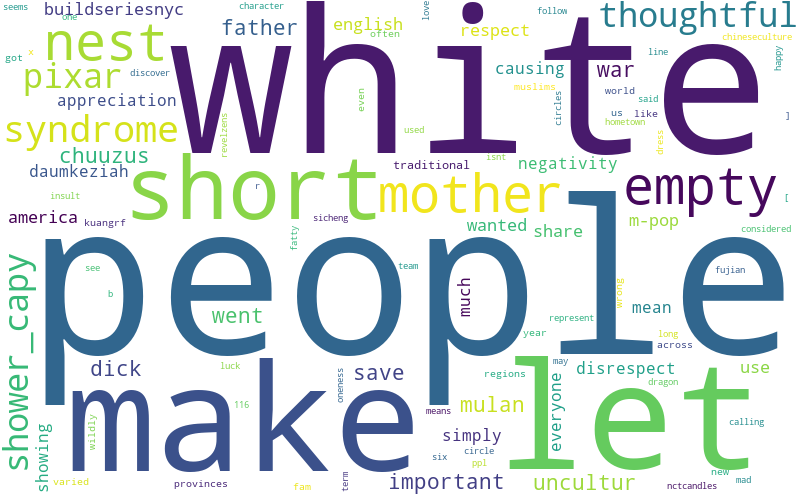

In [26]:
wc = WordCloud(background_color="white", max_words=100, width=800, height=500)
wc.generate_from_frequencies(counter)
wc.to_file("wordcloud_overall.png")

Image(filename="wordcloud_overall.png")

## Popular adjectives 

In [27]:
counter = get_counter(df, local_stopwords, target_tag="JJ")
counter.most_common(30)

[('short', 8740),
 ('thoughtful', 8725),
 ('syndrome', 8725),
 ('important', 2077),
 ('english', 1181),
 ('much', 1020),
 ('traditional', 429),
 ('wrong', 262),
 ('varied', 250),
 ('white', 175),
 ('fatty', 160),
 ('fujian', 139),
 ('[', 136),
 ('happy', 135),
 ('good', 119),
 ('long', 116),
 ('bad', 115),
 ('black', 112),
 ('flexible', 105),
 ('red', 102),
 ('thous', 85),
 ('new', 84),
 ('beautiful', 79),
 ('ideal', 79),
 ('russian', 77),
 ('whole', 61),
 ('great', 54),
 ('//t.co/dyo9iyvoz0', 54),
 ('full', 53),
 ('oppressive', 51)]

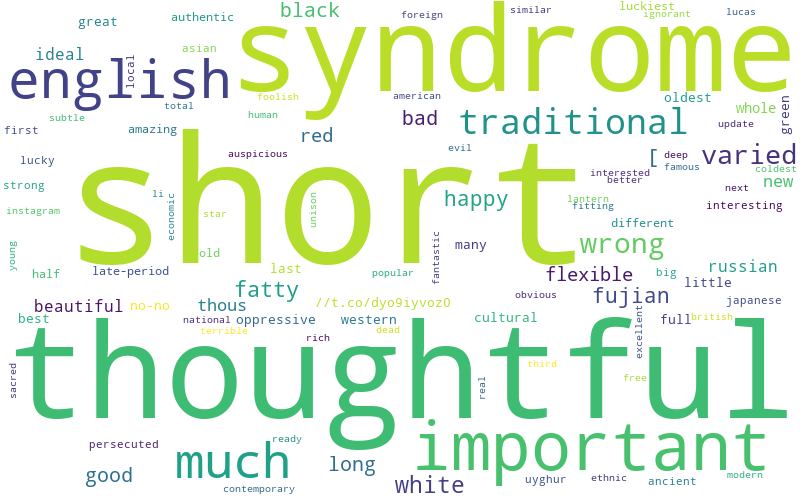

In [28]:
wc = WordCloud(background_color="white", max_words=100, width=800, height=500)
wc.generate_from_frequencies(counter)
wc.to_file("wordcloud_adj.png")

Image(filename="wordcloud_adj.png")

## Popular verbs

In [29]:
counter = get_counter(df, local_stopwords, target_tag="VB")
counter.most_common(30)

[('make', 8772),
 ('let', 8746),
 ('save', 2041),
 ('went', 2037),
 ('uncultur', 2036),
 ('wanted', 1221),
 ('respect', 1189),
 ('use', 1183),
 ('mean', 1012),
 ('showing', 1001),
 ('causing', 988),
 ('got', 268),
 ('fam', 250),
 ('used', 188),
 ('means', 168),
 ('calling', 164),
 ('mad', 163),
 ('r', 162),
 ('see', 146),
 ('said', 144),
 ('represent', 139),
 ('discover', 133),
 ('seems', 131),
 ('considered', 130),
 ('wearing', 127),
 ('draw', 123),
 ('took', 120),
 ('know', 117),
 ('manipulate', 105),
 ('appropriating', 101)]

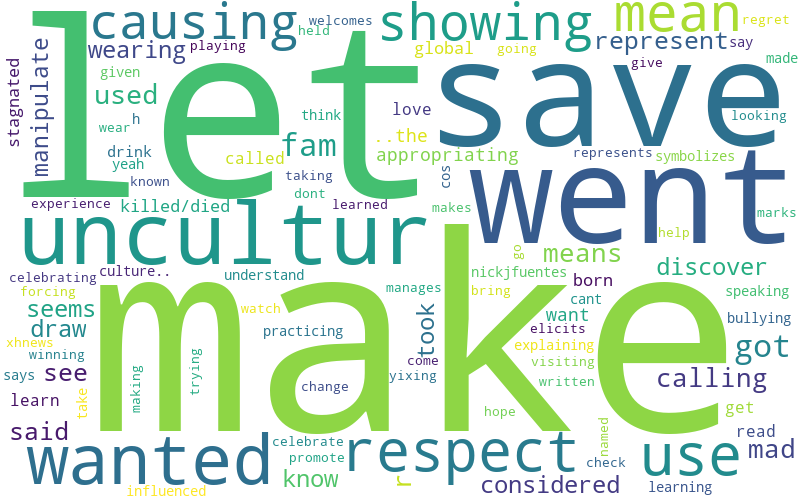

In [30]:
wc = WordCloud(background_color="white", max_words=100, width=800, height=500)
wc.generate_from_frequencies(counter)
wc.to_file("wordcloud_verb.png")

Image(filename="wordcloud_verb.png")

In [31]:
counter = get_counter(df, local_stopwords, target_tag="N")
counter.most_common(30)

[('people', 8956),
 ('white', 8733),
 ('mother', 8732),
 ('empty', 8726),
 ('nest', 8726),
 ('shower_capy', 8725),
 ('pixar', 8725),
 ('war', 2056),
 ('mulan', 2043),
 ('father', 2041),
 ('dick', 2036),
 ('chuuzus', 2036),
 ('share', 1284),
 ('m-pop', 1248),
 ('buildseriesnyc', 1188),
 ('america', 1176),
 ('daumkeziah', 1038),
 ('everyone', 1006),
 ('disrespect', 996),
 ('appreciation', 995),
 ('negativity', 988),
 ('year', 293),
 ('world', 284),
 ('provinces', 251),
 ('kuangrf', 251),
 ('regions', 250),
 ('x', 250),
 ('muslims', 232),
 ('new', 191),
 ('term', 174)]

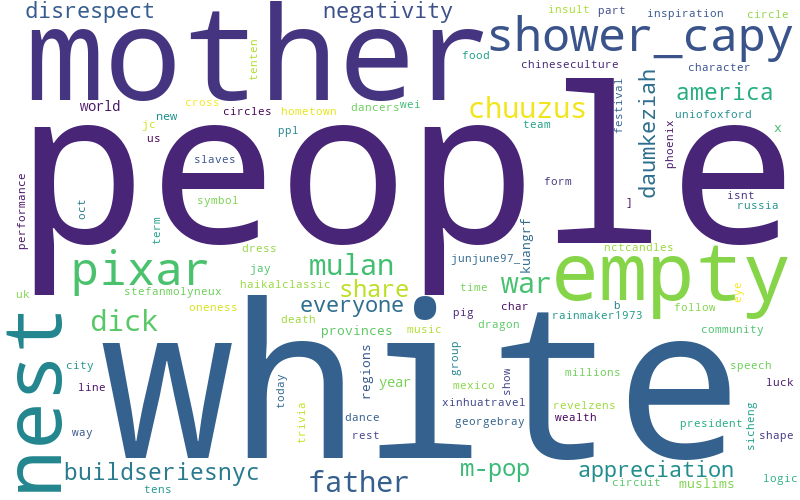

In [32]:
wc = WordCloud(background_color="white", max_words=100, width=800, height=500)
wc.generate_from_frequencies(counter)
wc.to_file("wordcloud_noun.png")

Image(filename="wordcloud_noun.png")

## Popular keywords among women

In [33]:
counter = get_counter(df, local_stopwords, target_user_gender="female")
counter.most_common(30)

[('people', 2732),
 ('white', 2722),
 ('make', 2696),
 ('let', 2691),
 ('short', 2688),
 ('thoughtful', 2685),
 ('mother', 2685),
 ('empty', 2685),
 ('shower_capy', 2685),
 ('nest', 2685),
 ('pixar', 2685),
 ('syndrome', 2685),
 ('important', 651),
 ('mulan', 646),
 ('dick', 644),
 ('went', 644),
 ('save', 644),
 ('chuuzus', 644),
 ('uncultur', 644),
 ('father', 644),
 ('war', 644),
 ('share', 347),
 ('m-pop', 339),
 ('respect', 337),
 ('wanted', 334),
 ('english', 327),
 ('buildseriesnyc', 325),
 ('use', 324),
 ('america', 323),
 ('much', 192)]

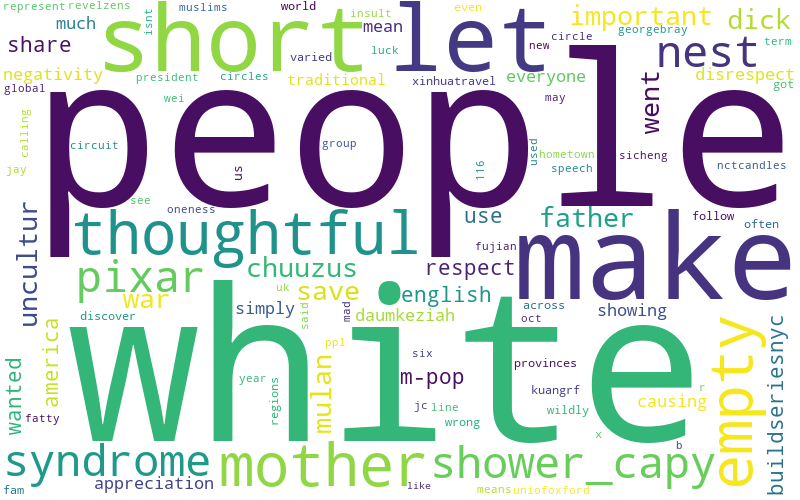

In [34]:
wc = WordCloud(background_color="white", max_words=100, width=800, height=500)
wc.generate_from_frequencies(counter)
wc.to_file("wordcloud_women.png")

Image(filename="wordcloud_women.png")

## Popular keywords among men

In [35]:
counter = get_counter(df, local_stopwords, target_user_gender="male")
counter.most_common(30)

[('people', 1454),
 ('white', 1443),
 ('make', 1412),
 ('short', 1403),
 ('let', 1400),
 ('thoughtful', 1399),
 ('mother', 1399),
 ('empty', 1399),
 ('shower_capy', 1399),
 ('nest', 1399),
 ('pixar', 1399),
 ('syndrome', 1399),
 ('daumkeziah', 323),
 ('much', 316),
 ('everyone', 309),
 ('mean', 309),
 ('showing', 306),
 ('disrespect', 305),
 ('appreciation', 304),
 ('causing', 303),
 ('simply', 303),
 ('negativity', 303),
 ('important', 217),
 ('war', 214),
 ('save', 212),
 ('father', 211),
 ('mulan', 210),
 ('dick', 210),
 ('went', 210),
 ('chuuzus', 210)]

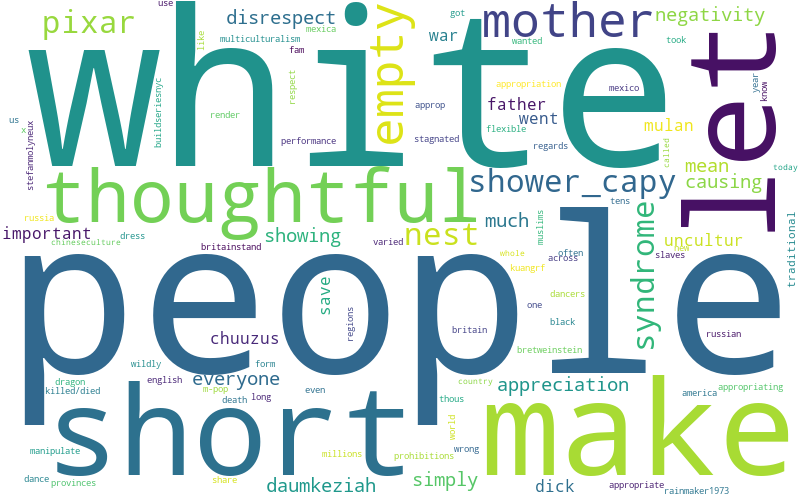

In [36]:
wc = WordCloud(background_color="white", max_words=100, width=800, height=500)
wc.generate_from_frequencies(counter)
wc.to_file("wordcloud_men.png")

Image(filename="wordcloud_men.png")

## Search for Tweets containing a certain string

In [37]:
target_string = "white"

In [38]:
df[df.text.str.contains(target_string, case=False, regex=False)][["user_screen_name", "text"]].head(10)

,user_screen_name,text
34,realDietmar,"RT @StefanMolyneux: Muslims took tens of millions of black and white slaves, most of them killed/died. Chinese culture stagnated for thous"
35,KarenWi151515,"RT @StefanMolyneux: Muslims took tens of millions of black and white slaves, most of them killed/died. Chinese culture stagnated for thous"
37,FattiBruti,"RT @StefanMolyneux: Muslims took tens of millions of black and white slaves, most of them killed/died. Chinese culture stagnated for thous"
38,sarantisn,"RT @StefanMolyneux: Muslims took tens of millions of black and white slaves, most of them killed/died. Chinese culture stagnated for thous"
41,CountSilvius,"RT @StefanMolyneux: Muslims took tens of millions of black and white slaves, most of them killed/died. Chinese culture stagnated for thous"
42,John40686280,"RT @StefanMolyneux: Muslims took tens of millions of black and white slaves, most of them killed/died. Chinese culture stagnated for thous"
43,bynaturenawty,"RT @StefanMolyneux: Muslims took tens of millions of black and white slaves, most of them killed/died. Chinese culture stagnated for thous"
44,DlMcfail,"RT @StefanMolyneux: Muslims took tens of millions of black and white slaves, most of them killed/died. Chinese culture stagnated for thous"
45,acaciarojokidd,"RT @StefanMolyneux: Muslims took tens of millions of black and white slaves, most of them killed/died. Chinese culture stagnated for thous"
46,Multnomahirregu,"RT @StefanMolyneux: Muslims took tens of millions of black and white slaves, most of them killed/died. Chinese culture stagnated for thous"


In [39]:
target_string = "short"

In [40]:
df[df.text.str.contains(target_string, case=False, regex=False)][["user_screen_name", "text"]].head(10)

,user_screen_name,text
10,m8nkey2chm00n,@weshightower @PoliticalShort @PotterOnPoltics The Taiwanese view themselves as the true Chinese culture. They've r https://t.co/HZVpoG298W
0,VNagarajNZ,"RT @RNeedhamnz: In Bao, the eight-minute short that precedes Incredibles 2, the animation giant is taking a bite of Chinese culture in"
1,JoeyJburt,"@shoe0nhead I don't think the short is confusing, but I don't even understand how learning about Chinese culture wo https://t.co/zJMbHyBtBl"
76,ndhrxx_,RT @Shower_Capy: Pixar: Let's make a thoughtful short about Chinese culture &amp; a mother with Empty Nest syndrome White people: THIS ISN'T M
77,KatHale8,RT @Shower_Capy: Pixar: Let's make a thoughtful short about Chinese culture &amp; a mother with Empty Nest syndrome White people: THIS ISN'T M
78,Brinaspark,RT @Shower_Capy: Pixar: Let's make a thoughtful short about Chinese culture &amp; a mother with Empty Nest syndrome White people: THIS ISN'T M
79,amber_dalleva,RT @Shower_Capy: Pixar: Let's make a thoughtful short about Chinese culture &amp; a mother with Empty Nest syndrome White people: THIS ISN'T M
80,Drihadian,RT @Shower_Capy: Pixar: Let's make a thoughtful short about Chinese culture &amp; a mother with Empty Nest syndrome White people: THIS ISN'T M
81,mikey8422,RT @Shower_Capy: Pixar: Let's make a thoughtful short about Chinese culture &amp; a mother with Empty Nest syndrome White people: THIS ISN'T M
82,annaborkowski,RT @Shower_Capy: Pixar: Let's make a thoughtful short about Chinese culture &amp; a mother with Empty Nest syndrome White people: THIS ISN'T M


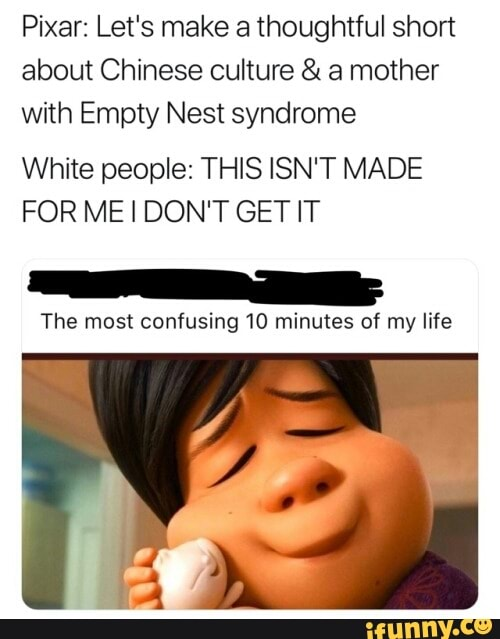

In [41]:
from IPython.display import Image
Image("bao.jpg")

In [42]:
target_string = "syndrome"

In [43]:
df[df.text.str.contains(target_string, case=False, regex=False)][["user_screen_name", "text"]].head(10)

,user_screen_name,text
76,ndhrxx_,RT @Shower_Capy: Pixar: Let's make a thoughtful short about Chinese culture &amp; a mother with Empty Nest syndrome White people: THIS ISN'T M
77,KatHale8,RT @Shower_Capy: Pixar: Let's make a thoughtful short about Chinese culture &amp; a mother with Empty Nest syndrome White people: THIS ISN'T M
78,Brinaspark,RT @Shower_Capy: Pixar: Let's make a thoughtful short about Chinese culture &amp; a mother with Empty Nest syndrome White people: THIS ISN'T M
79,amber_dalleva,RT @Shower_Capy: Pixar: Let's make a thoughtful short about Chinese culture &amp; a mother with Empty Nest syndrome White people: THIS ISN'T M
80,Drihadian,RT @Shower_Capy: Pixar: Let's make a thoughtful short about Chinese culture &amp; a mother with Empty Nest syndrome White people: THIS ISN'T M
81,mikey8422,RT @Shower_Capy: Pixar: Let's make a thoughtful short about Chinese culture &amp; a mother with Empty Nest syndrome White people: THIS ISN'T M
82,annaborkowski,RT @Shower_Capy: Pixar: Let's make a thoughtful short about Chinese culture &amp; a mother with Empty Nest syndrome White people: THIS ISN'T M
83,smile_yongguk,RT @Shower_Capy: Pixar: Let's make a thoughtful short about Chinese culture &amp; a mother with Empty Nest syndrome White people: THIS ISN'T M
84,rafiqrohizad,RT @Shower_Capy: Pixar: Let's make a thoughtful short about Chinese culture &amp; a mother with Empty Nest syndrome White people: THIS ISN'T M
85,NaeDreams,RT @Shower_Capy: Pixar: Let's make a thoughtful short about Chinese culture &amp; a mother with Empty Nest syndrome White people: THIS ISN'T M


In [44]:
target_string = "disrespect"

In [45]:
df[df.text.str.contains(target_string, case=False, regex=False)][["user_screen_name", "text"]].head(10)

,user_screen_name,text
10,tanguoxun,RT @daumkeziah: To everyone causing so much negativity: I mean no disrespect to the Chinese culture. Im simply showing my appreciation to
1268,23andkta,@hermit_hwarang Yeah report me for having an opinion and calling out a girl disrespecting Chinese culture. The Phil https://t.co/tMPI4xIESI
61,Navinpraveen93,RT @daumkeziah: To everyone causing so much negativity: I mean no disrespect to the Chinese culture. Im simply showing my appreciation to
14,orangebenefits,RT @daumkeziah: To everyone causing so much negativity: I mean no disrespect to the Chinese culture. Im simply showing my appreciation to
167,ChumComics,RT @daumkeziah: To everyone causing so much negativity: I mean no disrespect to the Chinese culture. Im simply showing my appreciation to
365,AdamJStaples,RT @daumkeziah: To everyone causing so much negativity: I mean no disrespect to the Chinese culture. Im simply showing my appreciation to
1,BGM199917,RT @daumkeziah: To everyone causing so much negativity: I mean no disrespect to the Chinese culture. Im simply showing my appreciation to
2,saramartino1995,RT @daumkeziah: To everyone causing so much negativity: I mean no disrespect to the Chinese culture. Im simply showing my appreciation to
5,desireekraft3,RT @daumkeziah: To everyone causing so much negativity: I mean no disrespect to the Chinese culture. Im simply showing my appreciation to
0,morseherrick,RT @daumkeziah: To everyone causing so much negativity: I mean no disrespect to the Chinese culture. Im simply showing my appreciation to


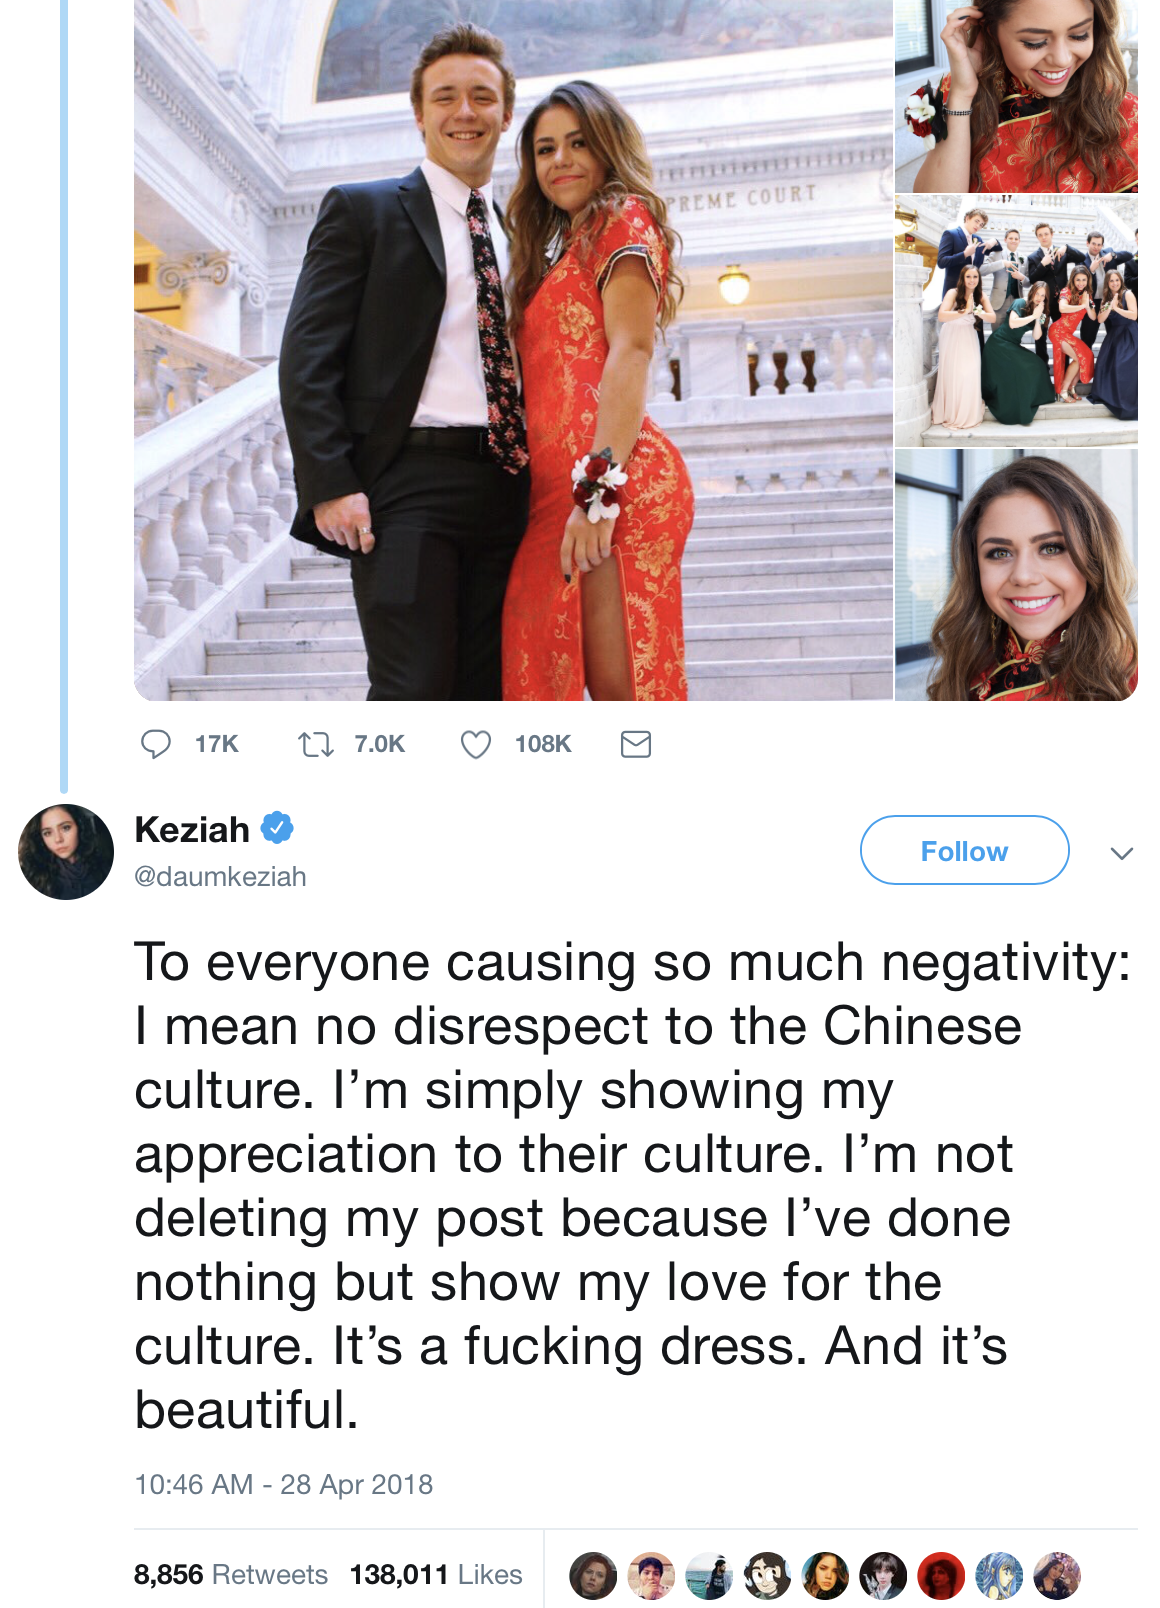

In [46]:
from IPython.display import Image
Image("dress.png")

In [47]:
target_string = "uncultur"

In [48]:
df[df.text.str.contains(target_string, case=False, regex=False)][["user_screen_name", "text"]].head(10)

,user_screen_name,text
1,JustDoItKikoo,RT @chuuzus: Mulan is important to the Chinese culture. She went to war to save her father &amp; China not for the dick you uncultur
62,Poetalin__,RT @chuuzus: Mulan is important to the Chinese culture. She went to war to save her father &amp; China not for the dick you uncultur
191,taylorlbunce,RT @chuuzus: Mulan is important to the Chinese culture. She went to war to save her father &amp; China not for the dick you uncultur
192,shadesof666,RT @chuuzus: Mulan is important to the Chinese culture. She went to war to save her father &amp; China not for the dick you uncultur
193,shaynarogers_,RT @chuuzus: Mulan is important to the Chinese culture. She went to war to save her father &amp; China not for the dick you uncultur
194,sassyblackdiva,RT @chuuzus: Mulan is important to the Chinese culture. She went to war to save her father &amp; China not for the dick you uncultur
195,laurenwoolseyy,RT @chuuzus: Mulan is important to the Chinese culture. She went to war to save her father &amp; China not for the dick you uncultur
196,blackdahliaaaaa,RT @chuuzus: Mulan is important to the Chinese culture. She went to war to save her father &amp; China not for the dick you uncultur
197,yeolfam,RT @chuuzus: Mulan is important to the Chinese culture. She went to war to save her father &amp; China not for the dick you uncultur
198,2002_isela,RT @chuuzus: Mulan is important to the Chinese culture. She went to war to save her father &amp; China not for the dick you uncultur


## Search for Tweets not containing a certain string

In [49]:
df[~df.text.str.contains(target_string, case=False, regex=False)][["user_screen_name", "text"]].head(10)

,user_screen_name,text
0,tailsandtea,@CherylYlove @kenchengcomedy Please don't paint Yulin as a representation of Chinese culture. There are many animal https://t.co/V5j9MJWmpj
1,paul_yield,"Tired: British culture, French culture, Chinese culture Wired: Union culture"
2,grandiana1,"RT @VindalooKurry: Traditionally, the most important birthday in Chinese culture is the 60th. In Chinese culture 60 years is one cycle of l"
3,CoventryUpdate,"RT @TheReviewsHub: #INTERVIEW Amy Ng talks Under the Umbrella, Chinese culture and the under-representation of actors of East Asian descent"
4,AJBank_TN,"Pigs are a symbol of wealth &amp; fortune in Chinese Culture. According to the Chinese New Year, 2019 is the Year of th https://t.co/wcp7QFDuF3"
5,Chris39452880,"#UmbrellaAcademy In Chinese culture, 4 is unlucky since it sounds similar to how they say death. And what is Klaus https://t.co/kGzx4Ba3D1"
6,unitytheatre,"RT @TheReviewsHub: #INTERVIEW Amy Ng talks Under the Umbrella, Chinese culture and the under-representation of actors of East Asian descent"
7,iTerryTommy,"@KylieCocoyama The dress was inspired by Chinese culture, designed by an Italian and was first shown on a (straight https://t.co/dvHOvRW9RZ"
8,__skyglass__,"RT @BUILDseriesNYC: I wanted to use English to respect the culture of America, and I wanted to share Chinese culture and M-Pop all over th"
9,galeharrier,Lion dancers from the Tucson Chinese Culture Center #TFOB So much to see! https://t.co/9LtmIFGHvY


In [50]:
df = df[~df.text.str.contains("white", case=False, regex=False)]

In [51]:
df = df[~df.text.str.contains("uncultur", case=False, regex=False)]

In [52]:
df = df[~df.text.str.contains("dick", case=False, regex=False)]

## Popular retweets

In [53]:
df_nodup = df.drop_duplicates(subset="text", keep="first")
df_nodup.sort_values(by="retweet_count", ascending=False)[["text", "retweet_count"]].head(30)

,text,retweet_count
0,@CherylYlove @kenchengcomedy Please don't paint Yulin as a representation of Chinese culture. There are many animal https://t.co/V5j9MJWmpj,0
14,The Chinese culture (in terms of marriage) highly values finding someone who can make your daughters life better.,0
16,"Though many people around the world enjoy Chinese culture, China's rise has aroused peoples suspicions in some cou https://t.co/bvE1caSD2b",0
17,@SLSmith000 Think how much older the Chinese culture is as compared to Western culture... and we think we can figur https://t.co/rSACQDJwTB,0
19,The yellow one is so pretty and I love chinese culture (it inspired her dress) https://t.co/3iRnc8i1fF,0
20,"RT @globaltimesnews: Though many people around the world enjoy Chinese culture, China's rise has aroused peoples suspicions in some countr",0
21,RT @AZChinese: Supporting a nice #chinese #restauraant to fight with the #unlawful #landlord at #Chinese #culture #center. #hotpot #style Y,0
23,"@GOP But to tell the truth,Green Hat doesn't have a good meaning in Chinese Culture",0
24,"@wIEBeBPbIA25yFZ @HuXijin_GT Chinese people and Chinese culture are amazing, hard-working, intelligent, and they ne https://t.co/Bbn0357FFB",0
25,RT @GiginaLong: Stop by and make some cultural crafts! Learn about the importance of dragons in Chinese culture (fun fact - my last name me,0


## Tweet volume change over time

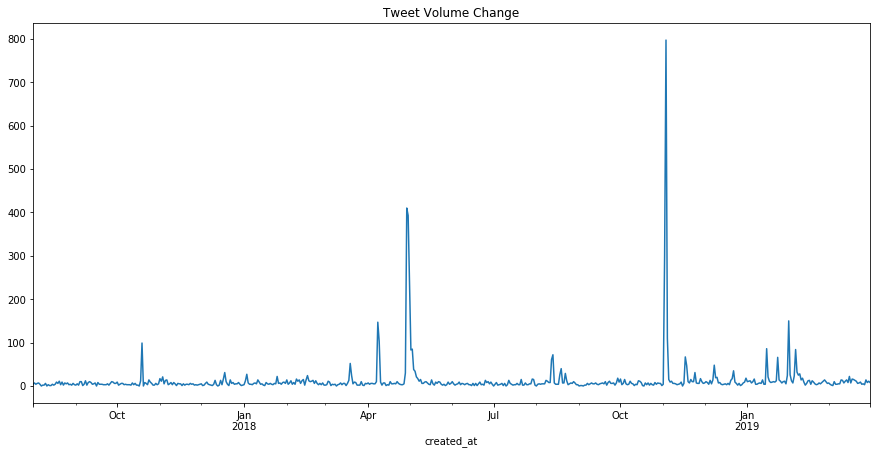

In [54]:
series = pd.Series(1, index=df.created_at).resample(rule="D").count()
series.plot(kind="line", title="Tweet Volume Change", figsize=(15,7))

In [55]:
series.max()      # the largest number of Tweets

797

In [56]:
series.idxmax()   # the highest peak day 

Timestamp('2018-11-03 00:00:00', freq='D')

## Search for Tweets with a given timerange

In [57]:
df_peak = df[(df.created_at >= series.idxmax()) & (df.created_at < series.idxmax()+pd.DateOffset(1))]
df_peak[["created_at", "text"]][:70]

,created_at,text
1,2018-11-03 01:54:46,"RT @BUILDseriesNYC: I wanted to use English to respect the culture of America, and I wanted to share Chinese culture and M-Pop all over th"
2,2018-11-03 01:32:27,"RT @BUILDseriesNYC: I wanted to use English to respect the culture of America, and I wanted to share Chinese culture and M-Pop all over th"
3,2018-11-03 01:38:56,"RT @BUILDseriesNYC: I wanted to use English to respect the culture of America, and I wanted to share Chinese culture and M-Pop all over th"
4,2018-11-03 01:33:24,"RT @BUILDseriesNYC: I wanted to use English to respect the culture of America, and I wanted to share Chinese culture and M-Pop all over th"
5,2018-11-03 03:53:27,"RT @BUILDseriesNYC: I wanted to use English to respect the culture of America, and I wanted to share Chinese culture and M-Pop all over th"
6,2018-11-03 03:56:37,"RT @BUILDseriesNYC: I wanted to use English to respect the culture of America, and I wanted to share Chinese culture and M-Pop all over th"
7,2018-11-03 03:57:56,"RT @BUILDseriesNYC: I wanted to use English to respect the culture of America, and I wanted to share Chinese culture and M-Pop all over th"
8,2018-11-03 03:58:15,"RT @BUILDseriesNYC: I wanted to use English to respect the culture of America, and I wanted to share Chinese culture and M-Pop all over th"
9,2018-11-03 03:58:17,"RT @BUILDseriesNYC: I wanted to use English to respect the culture of America, and I wanted to share Chinese culture and M-Pop all over th"
10,2018-11-03 03:38:46,"RT @BUILDseriesNYC: I wanted to use English to respect the culture of America, and I wanted to share Chinese culture and M-Pop all over th"


In [58]:
counter = get_counter(df_peak, local_stopwords)
counter.most_common(30)

[('share', 793),
 ('m-pop', 775),
 ('wanted', 743),
 ('buildseriesnyc', 741),
 ('use', 725),
 ('respect', 725),
 ('english', 725),
 ('america', 725),
 ('us', 68),
 ('music', 68),
 ('world', 52),
 ('//', 50),
 ('want', 50),
 ('yixing', 50),
 ('eternallyixing', 50),
 ('update', 18),
 ('story', 18),
 ('181103', 18),
 ('instagram', 16),
 ('lay', 16),
 ('exo_fanbase', 15),
 ('kevankenny', 2),
 ('host', 2),
 ('xingchannel', 2),
 ('ins', 2),
 ('inspiration', 1),
 ('draw', 1),
 ('team', 1),
 ('seems', 1),
 ('character', 1)]

## Search for active users

In [59]:
df.user_screen_name.value_counts(sort=True, ascending=False)

Tenten_NIRP        122
Best_of_Tara        29
Vemshnub            23
MrChessfu           18
businesschina7       9
nk_low               9
zhangzhe01           8
NeDuoDuo             7
femme_warrior        5
kidsareatrip         5
vitaphil1            5
nihaohello           4
ZJDailyMedia         4
LesbianSaturn        4
CIUSCenter           4
ztevetevans          4
bjkbrady             4
Wangwowuwo           4
Hornakkan            4
CGTNOfficial         3
RALahti2             3
ChinesewithPei       3
joannawan1           3
xuetingni            3
CenturyCruises       3
CultureWrld          3
Troy_CI              3
EssaysClass          3
ahe999               3
SnarkyPlatypus       3
                  ... 
wildberrytae         1
CANNIBAL_WASP        1
PraEwmyEH            1
Xbacklay             1
siriuschenn          1
sbditto85            1
johanna_etc          1
ArleneAlquizal1      1
TajSantacruz         1
charmedevanss        1
malin_ryden          1
JustRenderin         1
yjx1224    

In [60]:
active_users = df.user_screen_name.value_counts(sort=True, ascending=False)

for sname in active_users.index[:30]:
    print("https://twitter.com/" + sname)

https://twitter.com/Tenten_NIRP
https://twitter.com/Best_of_Tara
https://twitter.com/Vemshnub
https://twitter.com/MrChessfu
https://twitter.com/businesschina7
https://twitter.com/nk_low
https://twitter.com/zhangzhe01
https://twitter.com/NeDuoDuo
https://twitter.com/femme_warrior
https://twitter.com/kidsareatrip
https://twitter.com/vitaphil1
https://twitter.com/nihaohello
https://twitter.com/ZJDailyMedia
https://twitter.com/LesbianSaturn
https://twitter.com/CIUSCenter
https://twitter.com/ztevetevans
https://twitter.com/bjkbrady
https://twitter.com/Wangwowuwo
https://twitter.com/Hornakkan
https://twitter.com/CGTNOfficial
https://twitter.com/RALahti2
https://twitter.com/ChinesewithPei
https://twitter.com/joannawan1
https://twitter.com/xuetingni
https://twitter.com/CenturyCruises
https://twitter.com/CultureWrld
https://twitter.com/Troy_CI
https://twitter.com/EssaysClass
https://twitter.com/ahe999
https://twitter.com/SnarkyPlatypus


## Retweets vs. normal tweets

In [61]:
count = df.isna().groupby("retweeted_status_id").id.count()
count

retweeted_status_id
False    5566
True     2068
Name: id, dtype: int64

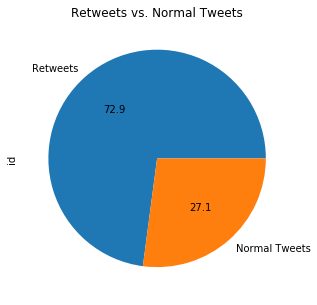

In [62]:
count.plot(kind="pie", title="Retweets vs. Normal Tweets", labels=["Retweets", "Normal Tweets"], figsize=(5,5), autopct='%.1f')

## Gender distribution

In [63]:
count = df.groupby("user_gender").user_id.count()
count

user_gender
andy        250
female     1753
male       1320
unknown    4311
Name: user_id, dtype: int64

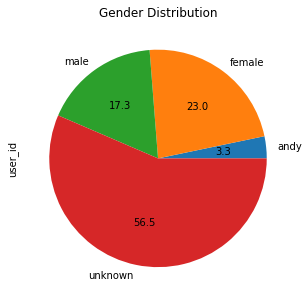

In [64]:
count.plot(kind="pie", title="Gender Distribution", labels=count.index, figsize=(5,5), autopct='%.1f')

## Sentiment distribution

In [65]:
df.polarity.describe()

count    7634.000000
mean        0.033473
std         0.152913
min        -0.800000
25%        -0.028125
50%         0.000000
75%         0.050000
max         1.000000
Name: polarity, dtype: float64

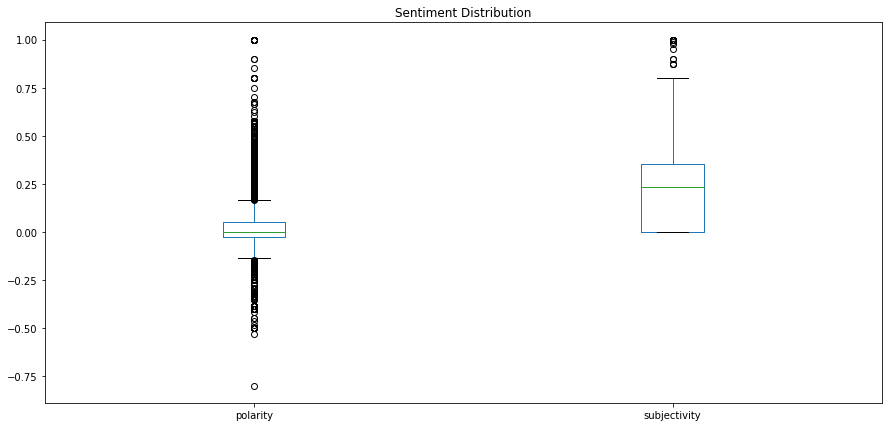

In [66]:
df[["polarity", "subjectivity"]].plot(kind="box", title="Sentiment Distribution", figsize=(15,7))